In [39]:
#access x_hh folder 
import sys
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
from pathlib import Path
from os.path import dirname, abspath
from pathlib import Path
import matplotlib.cm as cm
import scienceplots
import re


In [35]:
path_base = os.path.join(os.path.curdir, 'data_saved', 'Test_seed_7777', 'x_hh')
path_save = os.path.join(os.path.curdir, 'data_saved', 'Test_seed_7777', 'plots', 'x_hh')

In [36]:
print(glob.glob(path_base+"household_*_hh.csv"))

[]


In [37]:
df0 = pd.read_csv(os.path.join(path_base, 'household_296_hh.csv'))

#create two sorted df based on all_I and all_w
df0_I = df0.sort_values(by=['all_I'])
df0_w = df0.sort_values(by=['all_W'])

#safe id of each percentile in a list 
id_I = df0_I['hh_id'].tolist()
id_w = df0_w['hh_id'].tolist()
percentiles_I = []
percentiles_W = []
num_slices = 4          # For Quantiles

slice_size = len(id_I) // num_slices 

for i in range(num_slices):
    start_idx = i * slice_size
    end_idx = (i + 1) * slice_size
    percentiles_I.append(id_I[start_idx:end_idx])
    percentiles_W.append(id_w[start_idx:end_idx])

# Initialize dictionaries to store the average of all_I and all_W for each percentile
avg_all_I = {f'Percentile_{i+1}': [] for i in range(num_slices)}
avg_all_W = {f'Percentile_{i+1}': [] for i in range(num_slices)}

# Loop through each csv file in the x_hh folder
for timestep in range(296, 610, 1):     # Should correspond to the amount of steps in the simulation (amount of files)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(path_base, 'household_'+str(timestep)+'_hh.csv'))
    print(df)
   
    p_value_I = []
    p_value_w = []

    # Calculate the average all_I and all_W for each percentile
    for i, (p_I, p_W) in enumerate(zip(percentiles_I, percentiles_W)):

        avg_I = df[df['hh_id'].isin(p_I)]['all_I'].mean()
        avg_W = df[df['hh_id'].isin(p_W)]['all_W'].mean()  

        # Append the averages to the respective percentile keys in the dictionaries
        percentile_key = f'Percentile_{i+1}'
        avg_all_I[percentile_key].append(avg_I)
        avg_all_W[percentile_key].append(avg_W)


# Convert the dictionaries to DataFrames
df_avg_all_I = pd.DataFrame.from_dict(avg_all_I, orient='index').transpose()
df_avg_all_W = pd.DataFrame.from_dict(avg_all_W, orient='index').transpose()

# Save the DataFrames to CSV files
df_avg_all_I.to_csv(os.path.join(path_save, "avg_all_I.csv"), index=False)
df_avg_all_W.to_csv(os.path.join(path_save, "avg_all_W.csv"), index=False)


      hh_id       all_I    C_actual     all_w   all_labor  all_captial  \
0        92  225.791092  228.078140  2.207159  165.536940     7.875302   
1       944  150.987810  142.903375  0.727475   54.560648    49.699217   
2       696  202.710496  205.656238  1.810503  135.787714    15.849662   
3      2143  160.252790  163.688858  1.143964   85.797288    27.158357   
4      2189  123.190990  124.808396  1.046889   78.516672     5.422083   
...     ...         ...         ...       ...         ...          ...   
2495    409   71.902375   73.009729  0.500000   37.500000     4.222551   
2496    208  125.018644  127.060369  1.007946   75.595975     9.326115   
2497   1078  409.927355  404.329193  2.119169  158.937671   168.123037   
2498   1913  199.468944  202.123778  1.881460  141.109502     8.440236   
2499   1670  150.280019  152.728795  1.223953   91.796447    14.160375   

      all_UB_I  all_socben_I       all_W      real_I       all_C  
0          0.0     52.378850   29.699547  15

In [41]:
def calculate_averages(file_path, num_bins=20):
    df = pd.read_csv(file_path)
    # Calculate Sum_IW as the sum of all_I and all_W
    df['Sum_IW'] = df['all_I'] + df['all_W']

    # Bin households into percentiles based on their wealth
    df['Wealth_Bin'] = pd.qcut(df['Sum_IW'], q=num_bins, duplicates='drop')
    
    # Calculate average all_C and Sum_IW for each wealth bin
    averages = df.groupby('Wealth_Bin').agg({'all_C': 'mean', 'Sum_IW': 'mean'})
    
    # Store the averages as a tuple (average all_C, average Sum_IW)
    average_tuples = list(zip(averages['all_C'], averages['Sum_IW']))
    return average_tuples

file_pattern = "household_([0-9]+)_hh.csv"

time_step_data = {}

for file in os.listdir(path_base):
    match = re.match(file_pattern, file)
    if match:
        time_step = int(match.group(1))
        file_path = os.path.join(path_base, file)
        time_step_data[time_step] = calculate_averages(file_path)

# Convert the dictionary to a DataFrame and sort it by index (time step)
final_df = pd.DataFrame.from_dict(time_step_data, orient='index').sort_index()

# Save the DataFrame to a CSV file
final_df.to_csv(os.path.join(path_save, "wealth_over_consumption_distribution.csv"), header=True)

C:\Users\PAOvi\AppData\Local\Temp\ipykernel_27056\3224024253.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averages = df.groupby('Wealth_Bin').agg({'all_C': 'mean', 'Sum_IW': 'mean'})
C:\Users\PAOvi\AppData\Local\Temp\ipykernel_27056\3224024253.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averages = df.groupby('Wealth_Bin').agg({'all_C': 'mean', 'Sum_IW': 'mean'})
C:\Users\PAOvi\AppData\Local\Temp\ipykernel_27056\3224024253.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

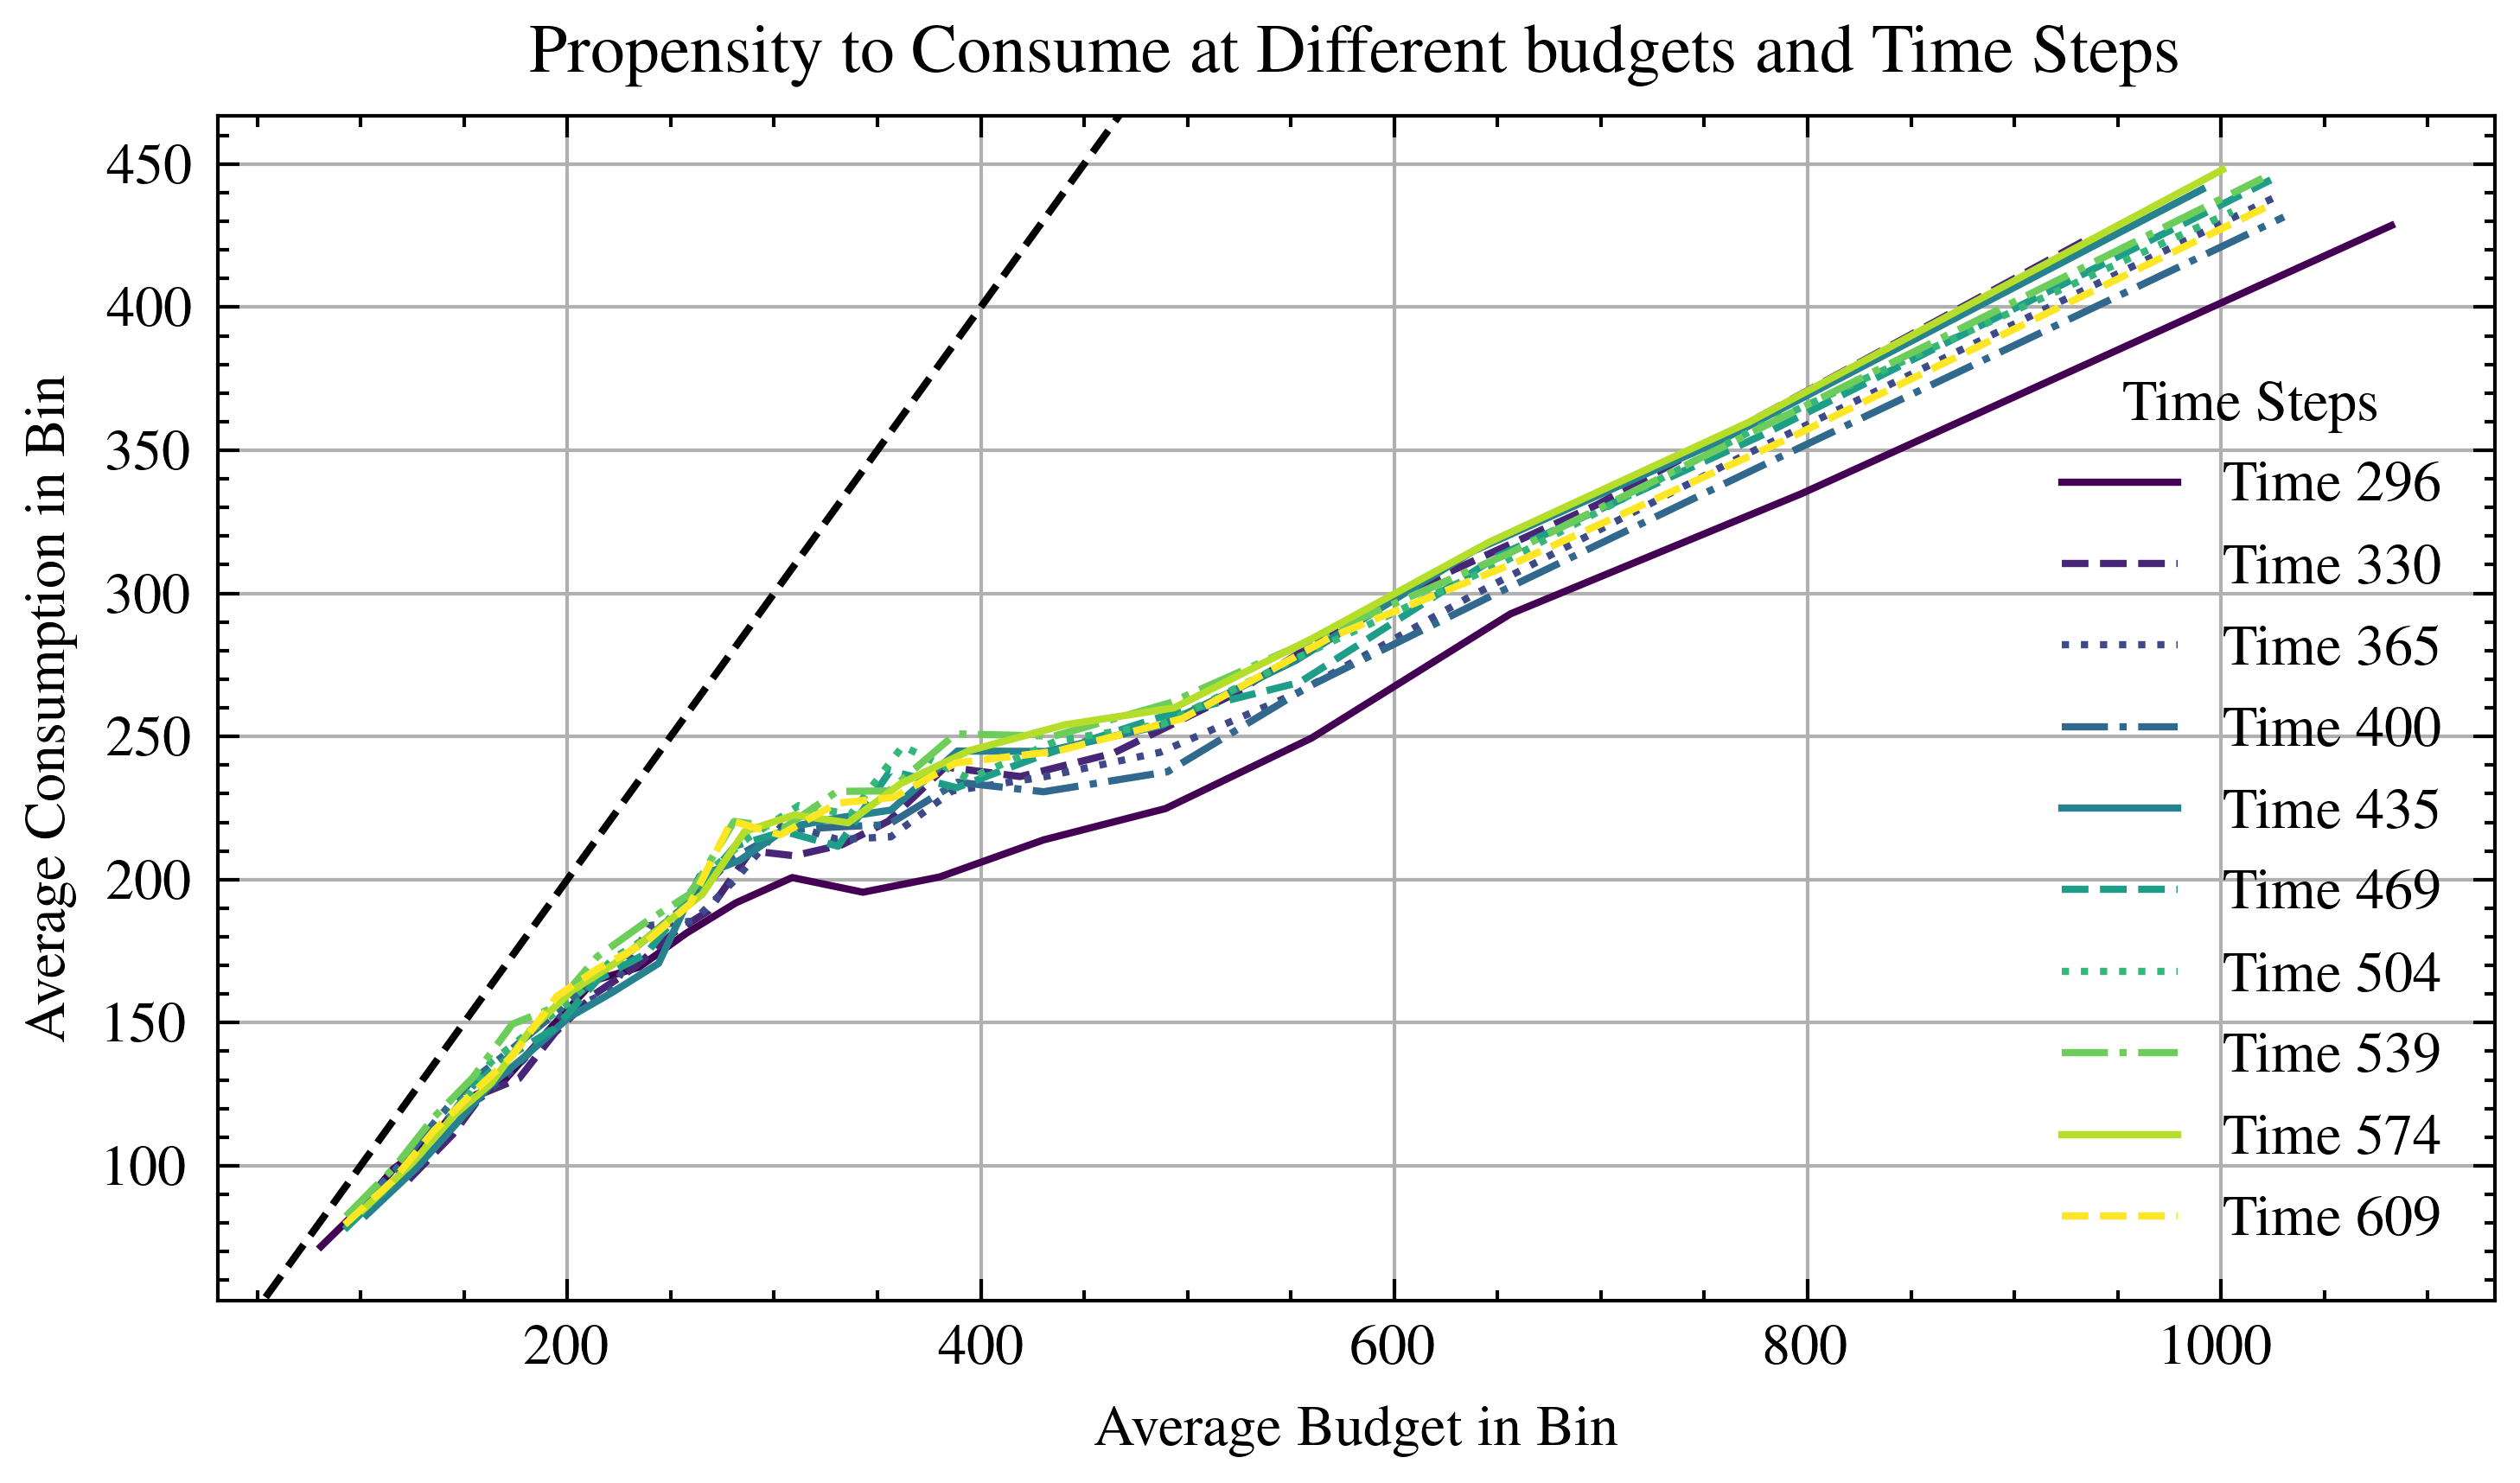

In [46]:
def add_45_degree_line(plot):
    """
    Adds a 45-degree line to the given plot without distorting it.

    Parameters:
    plot (matplotlib.pyplot): The plot to which the 45-degree line will be added.
    """
    # Getting current axis limits
    x_lim = plot.xlim()
    y_lim = plot.ylim()

    # Finding the maximum value between the current x and y limits
    max_lim = max(x_lim[1], y_lim[1])

    # Adding a 45-degree line
    plot.plot([0, max_lim], [0, max_lim], 'k--', label='45 Degree Line')

    # Resetting the axis limits to their original values
    plot.xlim(x_lim)
    plot.ylim(y_lim)

    return plot

df = final_df

plt.figure(figsize=(5, 3))
plt.style.use(['science', 'ieee'])      #using the science plot style

# Number of time steps you want to plot
max_time_steps_to_plot = 10

# Sample indices evenly across the DataFrame
indices_to_plot = np.linspace(0, len(df) - 1, max_time_steps_to_plot, dtype=int)

# Get the Viridis color map
cmap = cm.viridis

# Plotting
for idx in indices_to_plot:
    row = df.iloc[idx]
    average_all_C, average_Sum_IW = zip(*row.tolist())
    
    # Normalize the index for color mapping
    normalized_index = idx / (len(df) - 1)
    color = cmap(normalized_index)

    plt.plot(average_Sum_IW, average_all_C, label=f'Time {df.index[idx]}', color=color)

plt.xlabel('Average Budget in Bin')
plt.ylabel('Average Consumption in Bin')
plt.title('Propensity to Consume at Different budgets and Time Steps')
plt.grid(True)
plt.legend(title="Time Steps", loc='lower right')
plt.tight_layout()

# Adding a 45-degree line to the plot
add_45_degree_line(plt)
# Attempting to display the plot again
plt.show()

